Finding key connectors

In [1]:

users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" },
    { "id": 10, "name": "Jen" }
]

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [2]:
# first give each user an empty list
for user in users:
    user["friends"] = []

# and then populate the lists with friendships
for i, j in friendships:
    # this works because users[i] is the user whose id is i
    users[i]["friends"].append(users[j]) # add i as a friend of j
    users[j]["friends"].append(users[i]) # add j as a friend of i

In [3]:
users[0]["friends"]

[{'id': 1,
  'name': 'Dunn',
  'friends': [{'id': 0, 'name': 'Hero', 'friends': [...]},
   {'id': 2,
    'name': 'Sue',
    'friends': [{'id': 0, 'name': 'Hero', 'friends': [...]},
     {...},
     {'id': 3,
      'name': 'Chi',
      'friends': [{...},
       {...},
       {'id': 4,
        'name': 'Thor',
        'friends': [{...},
         {'id': 5,
          'name': 'Clive',
          'friends': [{...},
           {'id': 6,
            'name': 'Hicks',
            'friends': [{...},
             {'id': 8,
              'name': 'Kate',
              'friends': [{...},
               {'id': 7, 'name': 'Devin', 'friends': [{...}, {...}]},
               {'id': 9, 'name': 'Klein', 'friends': [{...}]}]}]},
           {'id': 7,
            'name': 'Devin',
            'friends': [{...},
             {'id': 8,
              'name': 'Kate',
              'friends': [{'id': 6,
                'name': 'Hicks',
                'friends': [{...}, {...}]},
               {...},
               {

In [4]:
def number_of_friends(user):
    """how many friends does _user_ have?"""
    return len(user["friends"]) # length of friend_ids list

In [5]:
print(number_of_friends(users[0]))

2


In [6]:
total_connections = sum(number_of_friends(user)
                        for user in users) 
num_users = len(users)
avg_connections = total_connections / num_users 

print("total connections", total_connections)
print("number of users", num_users)
print("average connections", avg_connections)

total connections 24
number of users 11
average connections 2.1818181818181817


Data scientists you may know

In [7]:
def friends_of_friend_ids_bad(user):
    # "foaf" is short for "friend of a friend"
    return [foaf["id"]
            for friend in user["friends"] # for each of user's friends
            for foaf in friend["friends"]] # get each of _their_ friends

In [8]:
print(friends_of_friend_ids_bad(users[3]))

[0, 2, 3, 0, 1, 3, 3, 5]


In [9]:
def not_the_same(user, other_user):
    """two users are not the same if they have different ids"""
    return user["id"] != other_user["id"]

In [10]:
def not_friends(user, other_user):
    """other_user is not a friend if he's not in user["friends"];
    that is, if he's not_the_same as all the people in user["friends"]"""
    return all(not_the_same(friend, other_user)
               for friend in user["friends"])

In [11]:
from collections import Counter # not loaded by default

def friends_of_friend_ids(user):
    return Counter(foaf["id"]
                   for friend in user["friends"]  # for each of my friends
                   for foaf in friend["friends"]  # count *their* friends
                   if not_the_same(user, foaf)    # who aren't me
                   and not_friends(user, foaf))   # and aren't my friends


In [12]:
print(friends_of_friend_ids(users[3]))

Counter({0: 2, 5: 1})


In [13]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [14]:
def data_scientists_who_like(target_interest):
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]

In [15]:
print (data_scientists_who_like("Hadoop"))

[0, 9]


In [16]:
from collections import defaultdict

# keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

# keys are user_ids, values are lists of interests for that user_id
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [17]:
def most_common_interests_with(user_id):
    return Counter(interested_user_id
        for interest in interests_by_user_id[user_id]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user_id)

In [18]:
most_common_interests_with(2)

Counter({3: 1, 5: 1, 7: 1})

Salaries and experience

In [19]:
from matplotlib import pyplot as plt

salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

In [20]:
def make_chart_salaries_by_tenure():
    tenures = [tenure for salary, tenure in salaries_and_tenures]
    salaries = [salary for salary, tenure in salaries_and_tenures]
    plt.scatter(tenures, salaries)
    plt.xlabel("Years Experience")
    plt.ylabel("Salary")
    plt.show()

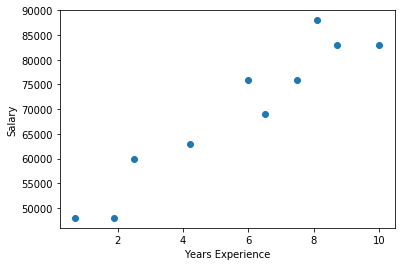

In [21]:
make_chart_salaries_by_tenure()

In [22]:
# keys are years
# values are the salaries for each tenure
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

In [23]:
def tenure_bucket(tenure):
    if tenure < 2: return "less than two"
    elif tenure < 5: return "between two and five"
    else: return "more than five"

In [24]:
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

In [25]:
 average_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [26]:
average_salary_by_bucket = {
  tenure_bucket : sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

In [27]:
average_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

Paid accounts

In [28]:
def predict_paid_or_unpaid(years_experience):
  if years_experience < 3.0: return "paid"
  elif years_experience < 8.5: return "unpaid"
  else: return "paid"

In [29]:
predict_paid_or_unpaid(0.4)

'paid'

Topics of interest

In [30]:
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())

In [31]:
 for word, count in words_and_counts.most_common():
        if count > 1:
            print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
